# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

In [50]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [51]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Aditya\Miniconda2\envs\py3k\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


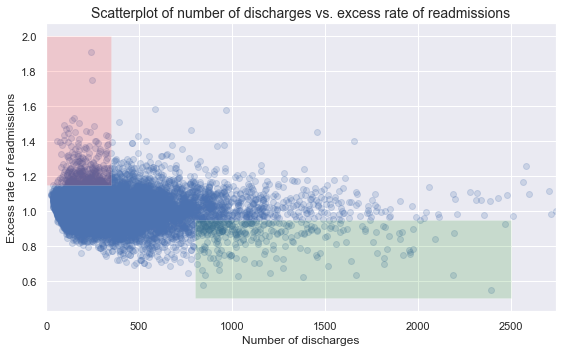

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [208]:
#Function to calculate bootstrap replicates.
def draw_bs_reps(data, func, size=1):
    #"""Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

**A.**

**From the scatter plot above, we can observe the inverse relation between number of discharge centers and excess readmission ratio. While this certainly suggests some correlation, we cannot conclude with certainly from a grapjical plot alone. To solve this problem, we will set up our null and alternate hypotheses and test for significance.** 

**As of now, it would be premature to assume that the excess readmission ratios is affected by the number of discharges in a facility. Perhaps, there are other variables that are driving the excess readmission ratios. However, we will initially test to see if there is a significant difference between facilities with less than 100 discharges and those with over a 1000.**

In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [52]:
df = clean_hospital_read_df

**Subsetting the dataframe to exclude rows with a NaN for Excess readmission ratio.**

In [53]:
df = df.loc[df['Excess Readmission Ratio'].notnull()]

 **B.**

**1.**

**Ho** - **There is no difference in the mean of readmission ratios for facilities with less than 100 discharges and those with greater than 100 discharges**

**Ha - There is a significant difference in the means of the excess readmission ratios for facilites with less than 100 discharges and those with greater than 1000 discharges**

C:\Users\Aditya\Miniconda2\envs\py3k\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


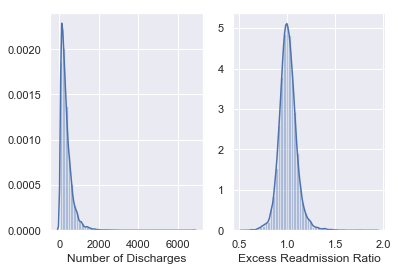

In [9]:
plt.subplot(1,2,1)
sns.distplot(df['Number of Discharges'])

plt.subplot(1,2,2)
sns.distplot(df['Excess Readmission Ratio'])

In [169]:
scipy.stats.normaltest(df['Excess Readmission Ratio'])

NormaltestResult(statistic=1531.4037674789765, pvalue=0.0)

In [170]:
scipy.stats.normaltest(df['Number of Discharges'])

NormaltestResult(statistic=8398.630108449166, pvalue=0.0)

**We see that the p-value is ~0 which means that the distributions aren't normally distributed. But since we have sufficient number of samples (n> 30), we can continue our analysis as it meets the requirements of the central limit theorem.**

**2.**

**Let us subset the data for facilities with <=100 discharges**

In [15]:
df1 = df.loc[df['Number of Discharges'] <= 100]

**Let us now subset the data for facilities with >= 1000 discharges.**

In [16]:
df2 = df.loc[df['Number of Discharges'] >= 1000]

**We now have two distributions that we want to test for similarity of distributions. Since we have the sample standard deviation andmean of the sample, we can compute the 2 sample t statistic test.**

In [15]:
t, p = ttest_ind(df1['Excess Readmission Ratio'], df2['Excess Readmission Ratio'])

In [16]:
t

10.029895332413446

In [17]:
p

4.9142568500221855e-23

**Let us confirm this using hacker statistics now.**

In [12]:
new_df = df.loc[(df['Excess Readmission Ratio'] <= 1000) | (df['Excess Readmission Ratio'] >= 1000)]

In [13]:
new_df_mean = new_df['Excess Readmission Ratio'].mean()

In [17]:
new_df1 = df1['Excess Readmission Ratio'] - df1['Excess Readmission Ratio'].mean() + new_df_mean
new_df2 = df2['Excess Readmission Ratio'] - df2['Excess Readmission Ratio'].mean() + new_df_mean

In [209]:
df1_bs_reps = draw_bs_reps(new_df1, np.mean, size=10000)
df2_bs_reps = draw_bs_reps(new_df2, np.mean, size=10000)

In [210]:
df_bs_reps_diff = df2_bs_reps - df1_bs_reps

In [217]:
p = np.sum(df_bs_reps_diff >= new_df_mean) / 10000

In [218]:
p

0.0

**3.**

**We have set our significant value to be $\alpha$ = .01. Our p-value stands at 4.91e-23 which is << $\alpha$. Hence, we can reject the null hypothesis. We have a statistically significant result. Our hackers statistics approach also confirmed the same.**

**4.**

**Statistical significance and practical significanc do not always go hand in hand. The results of this test suggests that users should prioritize signing up with facilities that have greater than 1000 discharge facilties. This is not practically possible. For example, people living in rural areas may not be able to access healthcare facilities of the suggested nature. Moreover, it's possible that people living in urban areas has better access and are able to sign up with facilities with a greater number of discharge facilities. Its also possible that enough budget hasn't been allocated for these facilities to expand their premises to accomodate for more number of discharges.**

**5.**

**The scatter plot above is intuitive enough to guess the inverse relation between number of discharge facilities and excess readmission rate. The red shaded area is also easy to notice which signifies the problem area. This paints a decent picture to the observer as to the problem area at hand. Based on this, they can probably formulate a null and alternate hypothesis.**

In [120]:
a, b = np.polyfit(df['Number of Discharges'], df['Excess Readmission Ratio'], deg = 1)

In [72]:
df['Number of Discharges'].min()

25

C:\Users\Aditya\Miniconda2\envs\py3k\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


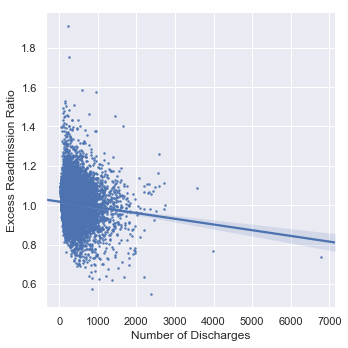

In [193]:
sns.lmplot(x = 'Number of Discharges',y = 'Excess Readmission Ratio', data = df,scatter_kws={"s": 2.5})

In [62]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [18]:
x_1000, y_1000 = ecdf(df2['Excess Readmission Ratio'])
x_100, y_100 = ecdf(df1['Excess Readmission Ratio'])

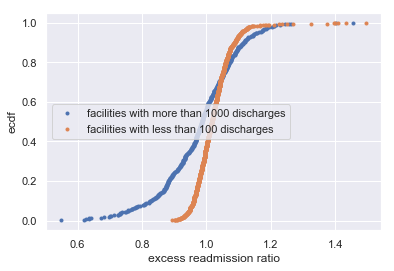

In [22]:
plt.plot(x_1000, y_1000, marker = '.', linestyle = 'none')
plt.plot(x_100, y_100, marker = '.', linestyle = 'none')
plt.xlabel('excess readmission ratio')
plt.ylabel('ecdf')
plt.legend(('facilities with more than 1000 discharges', 'facilities with less than 100 discharges'), loc = 'center left')

**From the above plot, we can observe the difference for facilities with less than 100 discharges and those with more than 1000. Faciltiies with greater than 1000 (curve in <font color='blue'> blue </font> ) have a lower average for excess readmission rates in comparison to those with more than 1000 discharges**

In [195]:
pearson_r, p_val = stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])

In [196]:
pearson_r

-0.09739794351079353

**The above pearson correlation coefficient is ~ -0.1 which indicates that with the increas in number of discharges, there is a greater chance of readmission.**

**However, we cannot ignore the magnitude of the above correlation coefficient. It may be negative but it is pretty close to 0. This signifies a weak correlation between the two variables (excess readmission ratio, number of discharges)..**

In [258]:
df1 = df.loc[df['Number of Discharges'] <= 100].groupby('State')['Excess Readmission Ratio'].count()

In [259]:
df1 = df1.reset_index()

In [260]:
df1.head()

,State,Excess Readmission Ratio
0,AK,8
1,AL,34
2,AR,16
3,AZ,17
4,CA,130


In [261]:
df1['percentage'] = df1['Excess Readmission Ratio'] / len(df.loc[df['Number of Discharges'] <= 100]) * 100

In [262]:
df1.columns = ['State', 'Excess readmissions count', 'percentage']

In [264]:
df1 = df1.set_index('State')

In [265]:
df1 = df1.sort_values(by = 'percentage', ascending = False)

In [266]:
df1.head()

,Excess readmissions count,percentage
State,,
CA,130,10.629599
TX,109,8.912510
NY,84,6.868357
GA,52,4.251840
FL,51,4.170074


Text(0,0.5,'Percentage of excess readmissions')

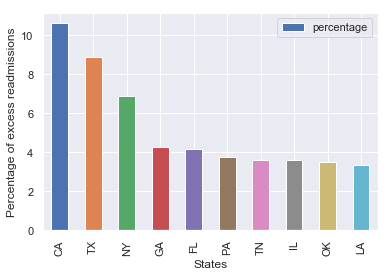

In [271]:
df1.head(10).plot(y = 'percentage', kind = 'bar')
plt.xlabel('States')
plt.ylabel('Percentage of excess readmissions')

**From the above plot, we see that for facilities with less than 100 discharges, the states of CA, TX and NY have the highest number of cases for this case study.**

<font color='red'>**It is perhaps interesting to note that California is the MOST POPULATED state in the USA FOLLOWED by TX. NY is the fourth most populated state with almost 10 million people residing in New York city itself. Could this be an interesting coincidence? Could it be that the general quality of these facilities is itself poor and doesn't have anything to do with the number of discharges? This could be due to the significantly large number of patients they have to treat in comparison to other states? It would be interesting to analyze the excess readmission rates by consider other variables for our analysis.** </font>

**The recommendation from the above study was that hospitals with less than 300 discharges should try and upgrade their services and that they shouldbe provided with incentives to have a greater number of discharges. Based on our tests, we can in no way conclude that facilities with less than 300 discharges need attention. Its because we did tests for facilities with <=100 discharges with those with >=1000 discharges.**

**Hence, we will carry out significant tests for facilities with <=300 discharges and those with >300 discharges.**

In [54]:
df_300 = df['Excess Readmission Ratio'].loc[df['Number of Discharges'] <= 300]

In [55]:
df_morethan_300 = df['Excess Readmission Ratio'].loc[df['Number of Discharges'] > 300]

In [59]:
t, p = ttest_ind(df_300, df_morethan_300)

In [60]:
t

8.447991822364562

In [61]:
p

3.319407529146751e-17

**From the p-value above, we see that there is a statistical significance between facilities with <300 discharges and those with >300. We will now plot the empirical cdfs of the two data sets to see if we can observe any significant difference.**

In [63]:
x_300, y_300 = ecdf(df_300)
x_more_than_300, y_more_than_300 = ecdf(df_morethan_300)

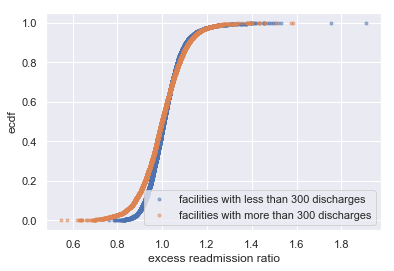

In [69]:
plt.plot(x_300, y_300, marker = '.', linestyle = 'none')
plt.plot(x_more_than_300, y_more_than_300, marker = '.', linestyle = 'none')
plt.xlabel('excess readmission ratio')
plt.ylabel('ecdf')
plt.legend(('facilities with less than 300 discharges', 'facilities with more than 300 discharges'), loc = 'lower right')

**From the above plot, we can see that the distributions are almost indistinguishable as we go higher up which coudl signify a weak correlation. Lets us now compute the correlation between our two variables of interest for facilities with less than 300 discharges vs. those with more than 300 discharges.**

In [71]:
pearson_r, p_val = stats.pearsonr(df['Number of Discharges'].loc[df['Number of Discharges'] <= 300], df_300)

In [72]:
pearson_r

-0.03569207382075737

In [73]:
pearson_r, p_val = stats.pearsonr(df['Number of Discharges'].loc[df['Number of Discharges'] > 300], df_morethan_300)

In [74]:
pearson_r

-0.07483162817021674

**Once again, we find a very weak correlation for both, the facilities with less than 300 discharges and those with more than 300 discharges. Hence, we can conclude that this neither an opt not a strong recommendation. There could be other variables driving the excess readmission ratios.Perhaps this could be due to low funding available to many of the facilities with lesser number of discharges. Or perhaps, the services are better in some states in general.**